In [1]:
import numpy as np
import cv2
import scipy as scp
import openslide as ops
from openslide import deepzoom
from Parse_Xml import Parse_Xml
import matplotlib.pyplot as plt
import PIL

Bad val 'TkAgg or echo backend : Agg' on line #1
	"backend : TkAgg or echo backend : Agg
"
	in file "/Users/sapchan/.matplotlib/matplotlibrc"
	Key backend: Unrecognized backend string 'tkagg or echo backend : agg': valid strings are ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


In [190]:
#slide = ops.open_slide('examples/36724.svs')
slide = ops.open_slide("examples/36724.svs")

In [168]:
dz = deepzoom.DeepZoomGenerator(slide,tile_size=1024,overlap=0, limit_bounds=True)
dz.level_count

18

In [173]:
dz.get_tile_coordinates(14,(0,0))
#45978
#46234

((46491, 70619), 1, (2049, 2049))

In [180]:
slide.properties['openslide.bounds-x']
slide.properties['openslide.bounds-y']
slide.read_region((0, 70619), 1, (2049, 2049))

'70619'

In [6]:
pxml = Parse_Xml("examples/GLEE029.xml","examples/GLEE029.scn")

Annotation Colors Present:
65280


In [7]:
mask = pxml.create_mask_for_color(65280)
#roi = pxml.extract_ROI(65280)

In [181]:
(min_x, min_y, max_x, max_y) = pxml.get_bounding_box_around_mask(65280)
x = min_x + int(slide.properties['openslide.bounds-x'])
y = min_y + int(slide.properties['openslide.bounds-y'])
w = max_x - min_x
h = max_y - min_y
slide = ops.open_slide(pxml.svsPath)

In [183]:
roi = slide.read_region((x,y),0,(w,h))

In [185]:
roi = np.array(roi)

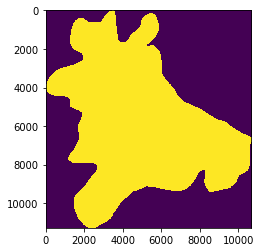

In [8]:
plt.figure()
plt.imshow(mask) 
plt.show()

In [186]:
roi.shape

(11276, 10634, 4)

In [187]:
mask.shape

(11276, 10634)

In [191]:
slide.properties['openslide.bounds-x']

<_PropertyMap {'aperio.AppMag': '20', 'aperio.DSR ID': 'uphs-lab-aperio', 'aperio.Date': '11/13/13', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '109', 'aperio.Filename': '36724', 'aperio.Focus Offset': '0.000000', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '36724', 'aperio.Left': '27.939253', 'aperio.LineAreaXOffset': '0.029961', 'aperio.LineAreaYOffset': '-0.045777', 'aperio.LineCameraSkew': '-0.000167', 'aperio.MPP': '0.5009', 'aperio.OriginalHeight': '28806', 'aperio.OriginalWidth': '38760', 'aperio.Parmset': 'FAINT', 'aperio.ScanScope ID': 'SS5135', 'aperio.StripeWidth': '2040', 'aperio.Time': '09:47:12', 'aperio.Time Zone': 'GMT-05:00', 'aperio.Top': '19.885866', 'aperio.User': '40355cf6-7c34-4ef0-bd1f-9c065f0eeb22', 'openslide.comment': 'Aperio Image Library v10.2.41\r\n38760x28806 [0,100 37968x28706] (256x256) JPEG/RGB Q=70|AppMag = 20|StripeWidth = 2040|ScanScope ID = SS5135|Filename = 36724|Date = 11/13/13|Time = 09:47